In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import spearmanr
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('input/input_1.csv')

In [3]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

In [4]:
df.League.unique()

array(['NBA', 'Euroleague', 'Israeli-BSL', 'Argentinian-Liga-A',
       'Australian-NBL', 'Austrian-A-Bundesliga', 'Balkan-BIL',
       'Belarusian-BPL', 'Belgium-Scooore-League', 'Bosnian-BiH-Liga',
       'Brazilian-NBB', 'British-BBL', 'Bulgarian-NBL', 'Canadian-NBL',
       'Chinese-CBA', 'Croatian-A-1-Liga', 'Czech-NBL',
       'Danish-Basketligaen', 'Estonian-Latvian-Basketball-League',
       'Eurocup', 'FIBA-Europe-Cup', 'Finnish-Korisliiga',
       'French-Jeep-Elite', 'Georgian-Super-Liga', 'German-BBL',
       'Greek-HEBA-A1', 'Hungarian-NBIA', 'Italian-Lega-Basket-Serie-A',
       'Japanese-BLeague', 'Kosovo-FBK', 'Lebanese-Division-A',
       'Lithuanian-LKL', 'Luxembourg-Total-League',
       'Macedonian-Superleague', 'Mexican-LNBP', 'Netherlands-DBL',
       'New-Zealand-NBL', 'Norwegian-BLNO', 'Polish-TBL',
       'Romanian-Divizia-A', 'Serbian-KLS', 'Slovakian-Extraliga',
       'Slovenian-SKL', 'South-Korean-KBL', 'Spanish-ACB',
       'Swedish-Basketligan', 'Swiss-LN

## HP 5

In [36]:
df_hp5 = df[['PTS','height_cm', 'weight', 'MIN', '3PM']]

In [37]:
df_hp5.head()

,PTS,height_cm,weight,MIN,3PM
0,2335,196.0,220.0,2482.6,299
1,1978,191.0,195.0,2473.7,270
2,1863,198.0,206.0,2511.8,141
3,1857,211.0,242.0,1916.9,89
4,1778,188.0,180.0,2120.1,205


In [38]:
df_hp5.count()

PTS          53798
height_cm    53724
weight       49232
MIN          53798
3PM          53798
dtype: int64

In [39]:
df_hp5 = df_hp5.dropna()

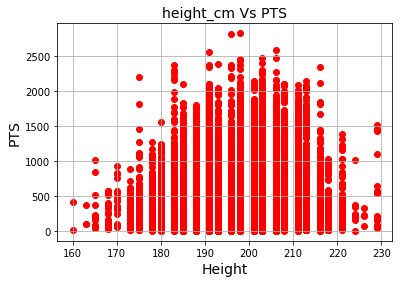

In [40]:
plt.scatter(df_hp5['height_cm'], df_hp5['PTS'], color='red')
plt.title('height_cm Vs PTS', fontsize=14)
plt.xlabel('Height', fontsize=14)
plt.ylabel('PTS', fontsize=14)
plt.grid(True)
plt.show()

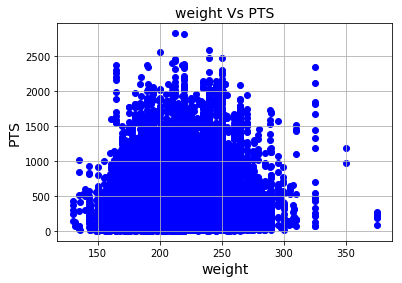

In [41]:
plt.scatter(df_hp5['weight'], df_hp5['PTS'], color='blue')
plt.title('weight Vs PTS', fontsize=14)
plt.xlabel('weight', fontsize=14)
plt.ylabel('PTS', fontsize=14)
plt.grid(True)
plt.show()

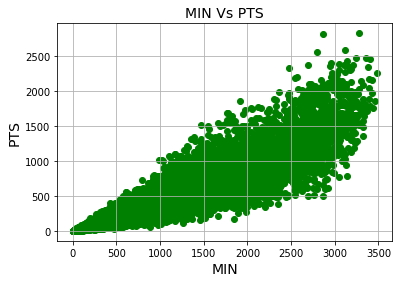

In [42]:
plt.scatter(df_hp5['MIN'], df_hp5['PTS'], color='green')
plt.title('MIN Vs PTS', fontsize=14)
plt.xlabel('MIN', fontsize=14)
plt.ylabel('PTS', fontsize=14)
plt.grid(True)
plt.show()

In [43]:
X = df_hp5[['height_cm','weight','MIN']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_hp5['PTS']

In [44]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 8.629e+04
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:17:34   Log-Likelihood:            -3.0191e+05
No. Observations:               49232   AIC:                         6.038e+05
Df Residuals:                   49228   BIC:                         6.039e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -72.3203     14.294     -5.059      0.0

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                  random_state=1)

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 12442.23
R²: 0.84


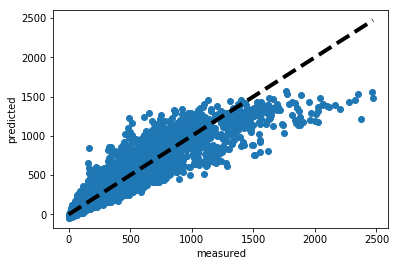

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [83]:
def f(row):
    if row['PTS'] > 1200:
        val = 1
    else:
        val = 0
    return val

In [84]:
df_hp5['active'] = df_hp5.apply(f,axis=1)

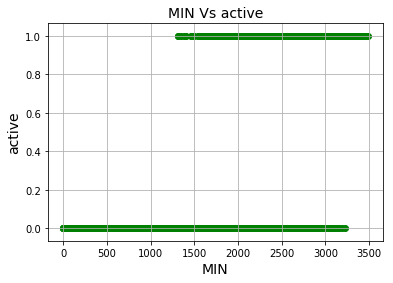

In [85]:
plt.scatter(df_hp5['MIN'], df_hp5['active'], color='green')
plt.title('MIN Vs active', fontsize=14)
plt.xlabel('MIN', fontsize=14)
plt.ylabel('active', fontsize=14)
plt.grid(True)
plt.show()

In [86]:
X = df_hp5[['MIN']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_hp5['active']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                  random_state=1)

In [88]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
y_predict_proba = reg.predict_proba(X_test)[:,1]

C:\Users\erfan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'Probability of high score')

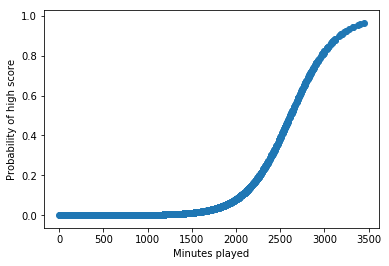

In [89]:
#matplotlib scatter funcion w/ logistic regression
plt.scatter(X_test['MIN'],y_predict_proba)
plt.xlabel("Minutes played")
plt.ylabel("Probability of high score")

Text(0, 0.5, 'Prediction and Probability of Predicted value')

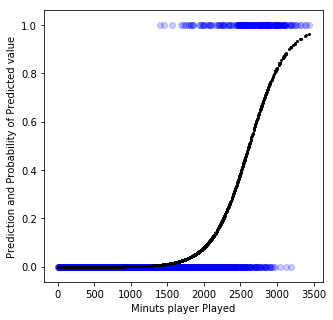

In [91]:

plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(X_test["MIN"], y_test, color='b', alpha=0.20)
ax.scatter(X_test['MIN'], y_predict_proba , color="black", s=4)
ax.set_xlabel('Minuts player Played')
ax.set_ylabel('Prediction and Probability of Predicted value')
